# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**Pooja Chawla**

Place your academic honesty statement below. Here are some acceptable examples.

<font color='red'>-   I verify that this is my own original work and I completed it without external human sources.</font>




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [1]:
# importing any necessary libraries
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# defining variables
R = 83.14 #cm3bar/(mol K)
T = 200 + 273 #Kelvin
P = 10 #bar

#rearrange ideal gas equation to solve for V
#V = RT/P
V = (R*T)/P #cm3

print('The volume of isopropanol in the ideal gas state is %.1f cm^3' %V) #displaying

The volume of isopropanol in the ideal gas state is 3932.5 cm^3


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [2]:
#defining variables for virial gas law
B = -388 #cm3/mol
C = -26000 #cm6/mol2

#defining a function, remember you need : at the end of the definition
def virial(V):
    #equation
    fV = ((P*V)/(R*T))-1-(B/V)-(C/(V*V))
    return fV #want to return the value of the fV with the given V value

#testing my function works
print(virial(5))
print(virial(np.arange(10)+2))
print(virial(3000))

1116.601271448704
[6693.00050858 3017.22298509 1721.00101716 1116.60127145  785.89041463
  585.04259635  453.75203432  363.10105404  297.8025429   249.15155752]
-0.10490855543140568


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



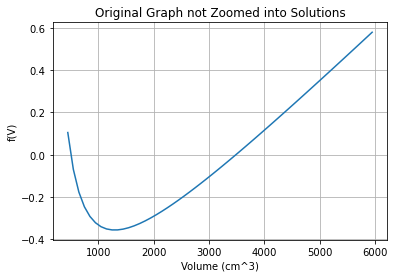

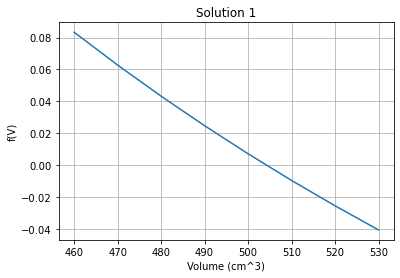

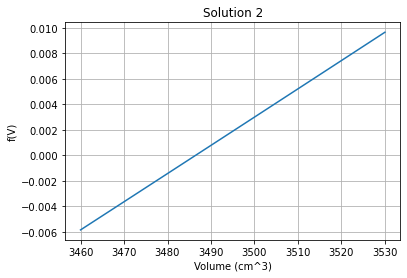

In [3]:
#plotting f(V)
x = np.arange(450,6000,100)
y = virial(x)

plt.plot(x,y)
plt.title('Original Graph not Zoomed into Solutions')
plt.xlabel('Volume (cm^3)')
plt.ylabel('f(V)')
plt.grid()
plt.show()

#zooming into solution 1
x1 = np.arange(460,540,10)
y1 = virial(x1)

plt.plot(x1,y1)
plt.title('Solution 1')
plt.xlabel('Volume (cm^3)')
plt.ylabel('f(V)')
plt.grid()
plt.show()

#zooming into solution 2
x2 = np.arange(3460,3540,10)
y2 = virial(x2)

plt.plot(x2,y2)
plt.title('Solution 2')
plt.xlabel('Volume (cm^3)')
plt.ylabel('f(V)')
plt.grid()
plt.show()


State in words where the solution(s) are.



<font color='red'>The two solutions are about 505 cm^3 and 3485 cm^3.</font>

### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.



<font color='red'> $f(V) = \frac{P}{RT}V^3 - V^2 - B V - C$ </font>

# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [4]:
#defining system as a function
def system(conditions,t,sigma,beta,rho):    
    x,y,z = conditions
    
    dxdt = sigma*(y-x)
    dydt = (rho*x)-y-(x*z)
    dzdt = (-beta*z) + (x*y)
    
    answers = [dxdt, dydt, dzdt]
    
    return answers

#defining other variables
sigma = 10
beta = 8/3
rho = 28
initial1 = [1, 1, 1]
t = np.arange(1,1000,0.1)

#running ode solver
solution1 = odeint(system, initial1, t, args=(sigma, beta, rho))

2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [5]:
#redefining conditions and running
initial2 = [1, 1, 0.9999]
solution2 = odeint(system, initial2, t, args=(sigma,beta,rho))

3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

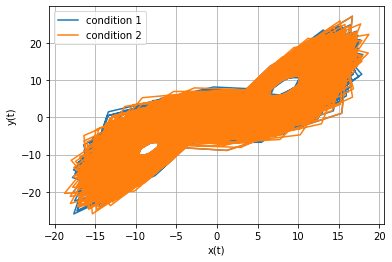

In [6]:
#plotting x vs y
plt.plot(solution1[:,0], solution1[:,1], label='condition 1')

plt.plot(solution2[:,0], solution2[:,1], label='condition 2')

plt.legend(loc='best')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.grid()
plt.show()

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

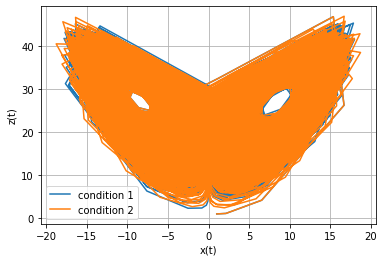

In [7]:
#plotting x vs z
plt.plot(solution1[:,0], solution1[:,2], label='condition 1')

plt.plot(solution2[:,0], solution2[:,2], label='condition 2')

plt.legend(loc='best')
plt.xlabel('x(t)')
plt.ylabel('z(t)')
plt.grid()
plt.show()

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

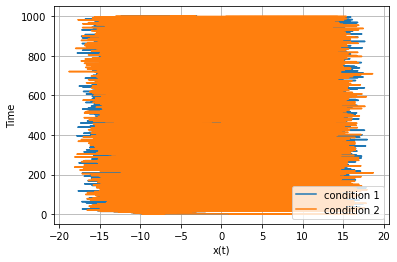

In [8]:
#plotting x
plt.plot(solution1[:,0], t,label='condition 1')

plt.plot(solution2[:,0], t, label='condition 2')

plt.legend(loc='best')
plt.xlabel('x(t)')
plt.ylabel('Time')
plt.grid()
plt.show()

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**Write your answer here.**

<font color='red'>After doing the simulations, it seems like changing the initial value of z completely changed the results that the solver outputted. </font>

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [28]:
#loading the data and separating it out
dat = np.genfromtxt('florida.csv',delimiter=',',dtype=None, encoding='utf-8')
headings = dat[0,:]
dat = np.asarray(dat[1:,:], dtype=float)
colors = dat[:,0]



Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

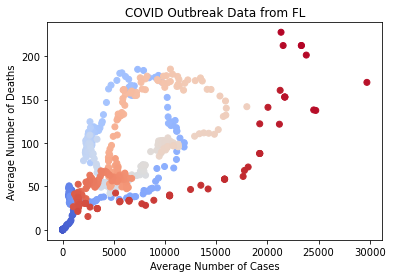

In [29]:
#plot it!
plt.scatter(dat[:,1],dat[:,2],c=colors,cmap='coolwarm') #colors start at blue and continue until dark red
plt.title('COVID Outbreak Data from FL')
plt.xlabel('Average Number of Cases')
plt.ylabel('Average Number of Deaths')
plt.show()


**Put Commentary here:**

<font color='red'>The earlier weeks are designated by the blue color seen in the bottom left corner of the graph and the later weeks progressively get more red as seen in the top right corner of the graph. It seems that there were multiple surges in average number of cases and deaths where it increases for a few months and then decreases for a long while before surging again. It also seems like there's another surge occurring at the end of the data since both numbers are increasing very rapidly but also starting to decrease again and creating that circular shape in the graph. It also seems like as cases increase, so do the number of deaths.</font>

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

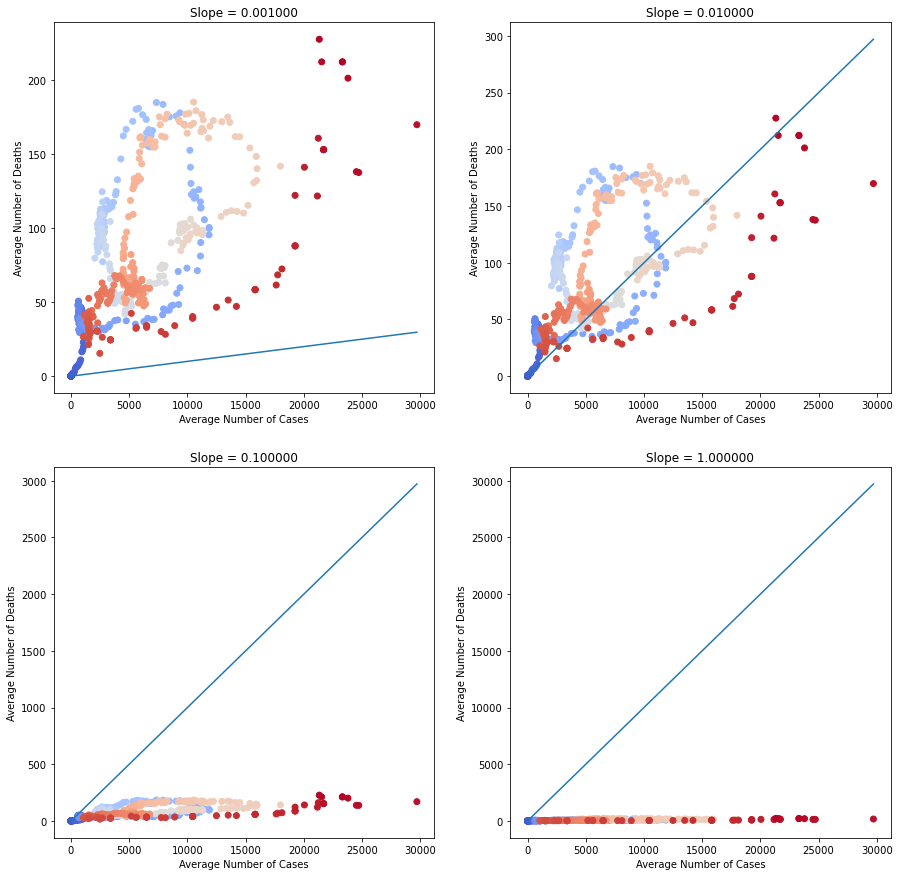

In [43]:
#for-loop to add straight lines
slopes = [0.001,0.01,0.1,1]
x = np.linspace(0,max(dat[:,1]),10)
fig, ax= plt.subplots(2,2,figsize=(15,15))
for slope in slopes:
    #plot it but add lines to it
    plt.subplot(2,2,slopes.index(slope)+1)
    plt.scatter(dat[:,1],dat[:,2],c=colors,cmap='coolwarm') #colors start at blue and continue until dark red
    plt.title('Slope = %f' %slope)
    plt.xlabel('Average Number of Cases')
    plt.ylabel('Average Number of Deaths')
    
    #add slope
    y = slope*x
    plt.plot(x,y)
    
plt.show()

Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

<font color='red'> It seems like the line with the slope of 0.01 has the best fit when evaluating it visually. Best fit means that the line is closest to all of the data points. </font>

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:


**Upload your jupyter notebook to Canvas for grading. Thank you!

<font color='red'> Link to github repository: https://github.com/poojac831/Che_Math </font>